In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100000, n_features=25)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_cal, X_test, y_cal, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f"{X_train.shape}")
print(f"{X_test.shape}")
print(f"{X_cal.shape}")

(90000, 25)
(5000, 25)
(5000, 25)


In [3]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [4]:
ada_probas = ada_clf.predict_proba(X_test)[:, 1]
ada_probas

array([0.47398187, 0.52301728, 0.48239049, ..., 0.48093978, 0.50881764,
       0.48024609])

In [5]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

def plot_calibration_curve(name, fig_index, probs):

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    
    frac_of_pos, mean_pred_value = calibration_curve(y_test, probs, n_bins=10)

    ax1.plot(mean_pred_value, frac_of_pos, "s-", label=f'{name}')
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title(f'Calibration plot ({name})')
    
    ax2.hist(probs, range=(0, 1), bins=10, label=name, histtype="step", lw=2)
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")

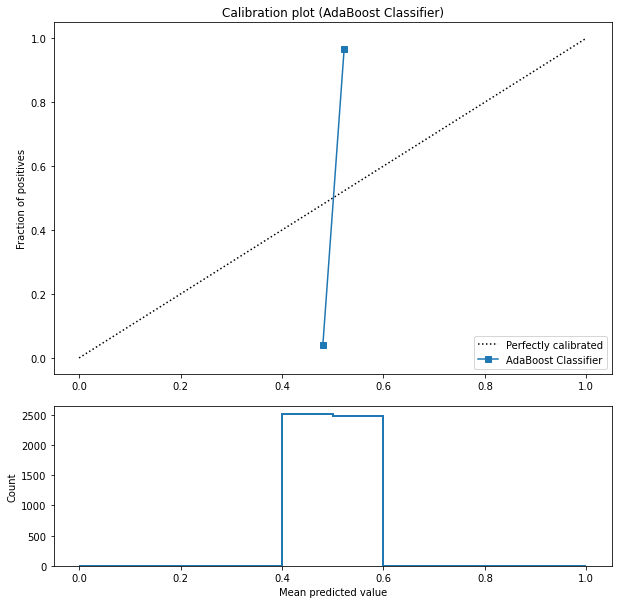

In [6]:
plot_calibration_curve("AdaBoost Classifier", 1, ada_probas)

In [7]:
ada_probas_cal = ada_clf.predict_proba(X_cal)[:, 1]

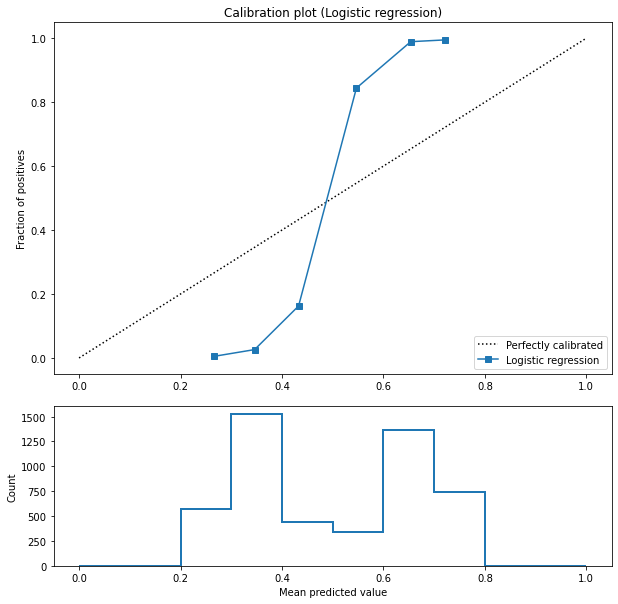

In [10]:
from sklearn.linear_model import LogisticRegression

lr_cal = LogisticRegression(random_state=42)
lr_cal.fit(ada_probas_cal.reshape(-1, 1), y_cal)
lr_cal_probas = lr_cal.predict_proba(ada_probas.reshape(-1, 1))[:, 1]

plot_calibration_curve("Logistic regression", 1, lr_cal_probas)

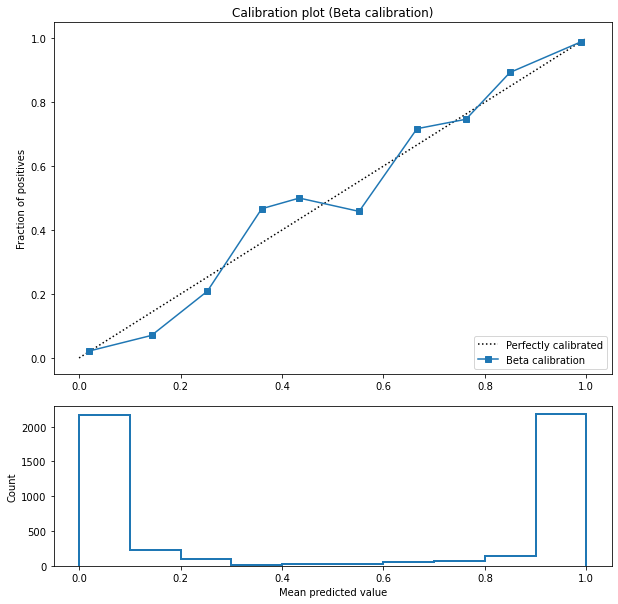

In [8]:
from betacal import BetaCalibration

bc = BetaCalibration(parameters="abm")
bc.fit(ada_probas_cal, y_cal)

bc_probas = bc.predict(ada_probas)
plot_calibration_curve("Beta calibration", 1, bc_probas)